In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell

from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/MyDrive/PHYS6060/ML_strategy/')

from data import Data

Mounted at /content/gdrive


In [64]:
path = "/content/gdrive/MyDrive/PHYS6060/ML_strategy/plots/"

In [2]:
ticker = 'MSFT'
data = Data(tickers=[ticker], max=True)

[*********************100%%**********************]  1 of 1 completed


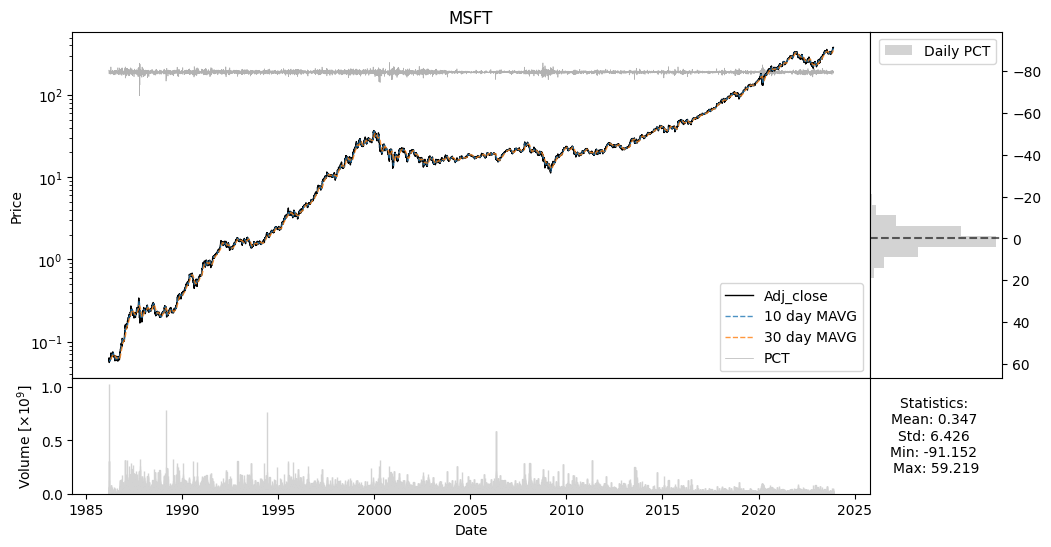

<Figure size 640x480 with 0 Axes>

In [3]:
data.quick_view(logy=True)

In [90]:
# Set parameters for the Gaussian distribution
mean = 0.03  # Mean of the distribution
std_dev = 0.1 # Standard deviation of the distribution
num_samples = 20  # Number of samples to generate

# Generate random samples from a Gaussian distribution
daily_changes = np.random.normal(mean, std_dev, num_samples)

noise = lambda std: np.random.normal(0, std, num_samples)

# np.random.lognormal(mean, std_dev, num_samples) - np.exp(mean + 0.05**2 / 2)

predicted_changes = daily_changes + noise(0.2)
# predicted_changes = np.random.normal(0.01, 0.1, num_samples)

# Calculate cumulative product to simulate cumulative growth
cumulative_growth = np.cumprod(1 + daily_changes)
cumulative_growth_pred = np.cumprod(1 + predicted_changes)

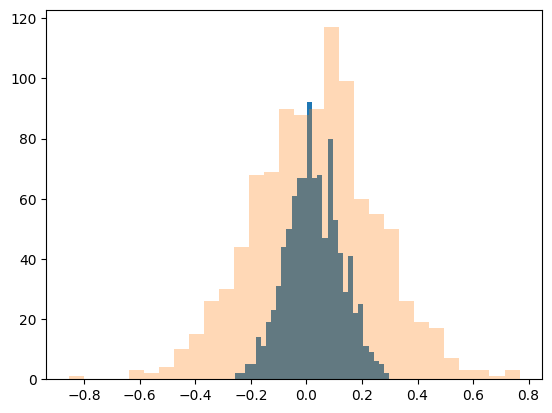

In [52]:
plt.hist(daily_changes, bins=30)
plt.hist(predicted_changes, bins=30, alpha=0.3)
plt.show()

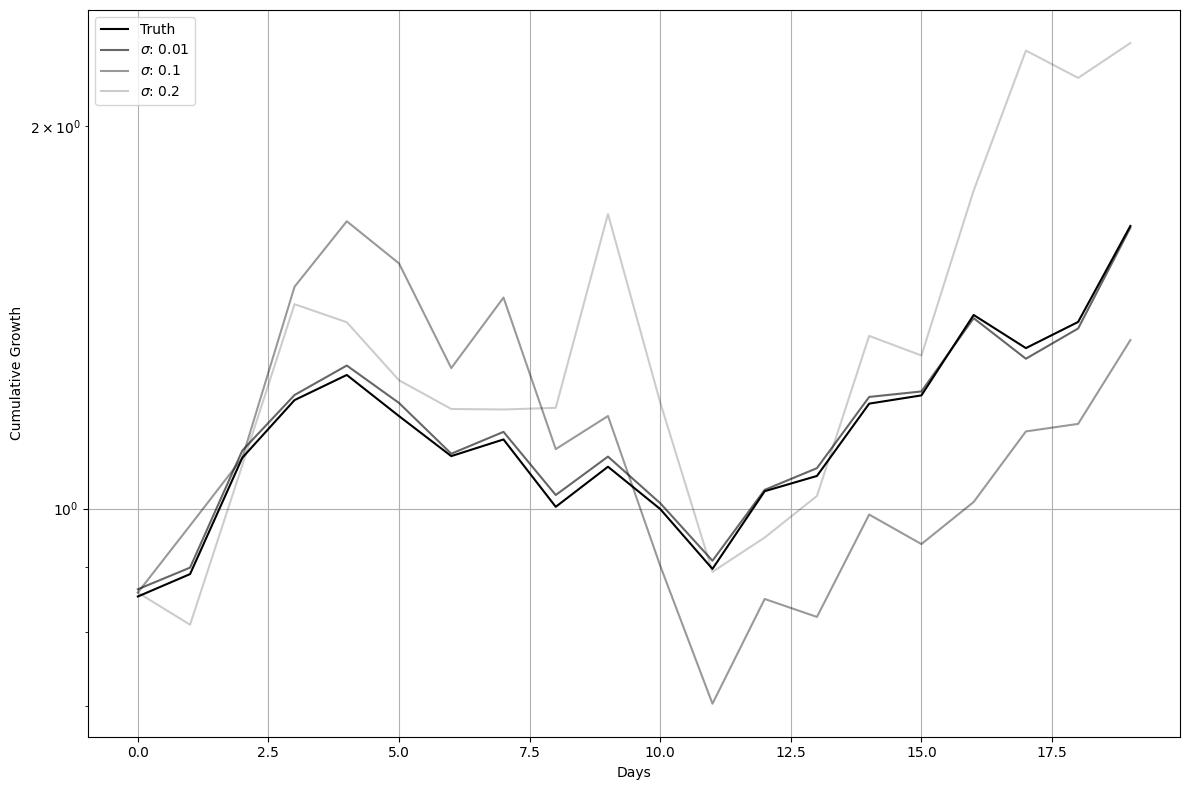

In [93]:
std_list = [0.01, 0.1, 0.2]

plt.figure(figsize=(12,8))
plt.plot(cumulative_growth, label="Truth", color='k')
count = 0.6
for std in std_list:
  predicted_changes = daily_changes + noise(std)
  cumulative_growth = np.cumprod(1 + daily_changes)
  cumulative_growth_pred = np.cumprod(1 + predicted_changes)
  plt.plot(cumulative_growth_pred, color='k',label=r"$\sigma$: "+str(std), alpha=count)
  plt.yscale('log')
  count-=0.2

plt.grid()
plt.xlabel('Days')
plt.ylabel('Cumulative Growth')
plt.legend()
plt.tight_layout()
plt.savefig(path+"cumulative_growth_example_20days.pdf")

## Add noise to the daily changes

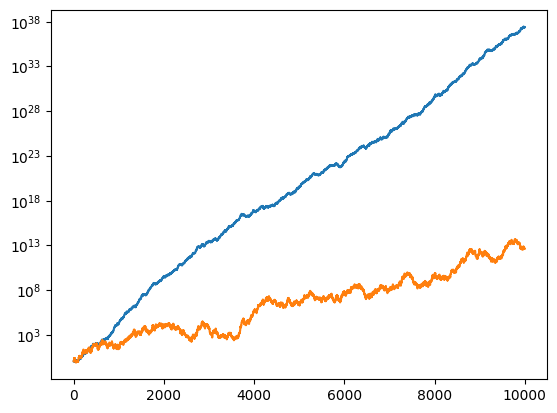

In [110]:
noise_std_dev = 0.1 # Standard deviation for the noise
noise = np.random.normal(0, noise_std_dev, num_samples)

daily_changes_with_error = daily_changes + noise

cumulative_growth_with_error = np.cumprod(1 + daily_changes_with_error)

plt.plot(cumulative_growth)
plt.plot(cumulative_growth_with_error)
plt.yscale('log')

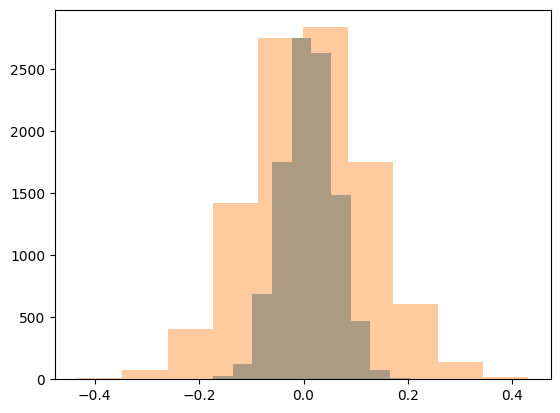

In [83]:
plt.hist(daily_changes, alpha=0.6)
plt.hist(daily_changes_with_error, alpha=0.4)
plt.show()

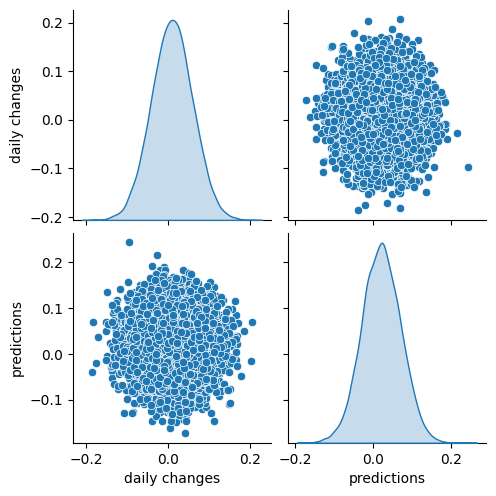

<Figure size 640x480 with 0 Axes>

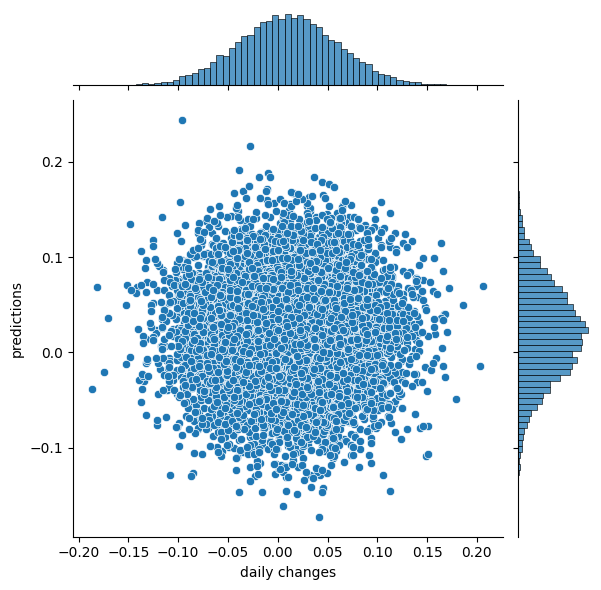

In [126]:
import seaborn as sns
import pandas as pd

compare = {"daily changes":daily_changes, "predictions":predicted_changes}
df = pd.DataFrame(compare)

sns.pairplot(df, diag_kind='kde', kind='scatter', markers='o', height=2.5, aspect=1)
plt.show()
plt.clf()

sns.jointplot(x='daily changes', y='predictions', data=df, kind='scatter')
plt.show()

In [85]:
# Convert lists to numpy arrays if they aren't already
daily_changes = np.array(daily_changes)
daily_changes_with_error = np.array(daily_changes_with_error)

# Calculate the percent error
percent_error = np.abs((daily_changes - daily_changes_with_error) / daily_changes) * 100

In [86]:
percent_error


array([  7.29708247, 478.70081791,  51.4022733 , ..., 207.25842451,
       697.36489762,  63.95284278])

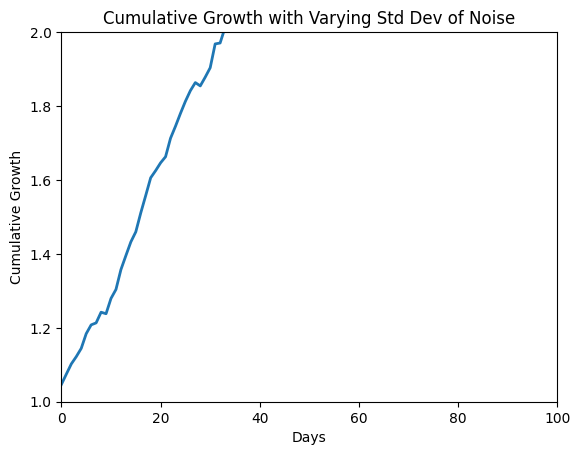

In [115]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Example: Actual daily changes
actual_changes = np.random.normal(0.02, 0.005, 100)  # Simulated actual values

# Range of standard deviations for noise
std_dev_range = np.linspace(0.001, 0.01, 50)  # Example range from 0.001 to 0.01

# Function to calculate cumulative growth
def cumulative_growth(daily_changes):
    return np.cumprod(1 + daily_changes)

# Prepare the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, len(actual_changes))
ax.set_ylim(1, 2)  # Adjust this based on your expected growth
ax.set_xlabel('Days')
ax.set_ylabel('Cumulative Growth')
ax.set_title('Cumulative Growth with Varying Std Dev of Noise')

def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    std_dev = std_dev_range[i]
    predicted_changes = actual_changes + np.random.normal(0, std_dev, len(actual_changes))
    y = cumulative_growth(predicted_changes)
    line.set_data(range(len(y)), y)
    return line,

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(std_dev_range), init_func=init, blit=True)

# Display the animation in a Jupyter notebook
HTML(ani.to_jshtml())